In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import random
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2
TRAINING_DIR = "E:\Machine_Learning\PROJECTS\FireDetection\DATA\DATA_NEW\FIRE-SMOKE-DATASET\Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "E:\Machine_Learning\PROJECTS\FireDetection\DATA\DATA_NEW\FIRE-SMOKE-DATASET\Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
  layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 10,
validation_data = validation_generator,
validation_steps = 14)

Epoch 1/10
14/14 [==============================] - 650s 46s/step - loss: 12.5595 - acc: 0.7835 - val_loss: 0.1791 - val_acc: 0.9337
Epoch 2/10
14/14 [==============================] - 538s 36s/step - loss: 0.1546 - acc: 0.9492 - val_loss: 0.1488 - val_acc: 0.9439
Epoch 3/10
14/14 [==============================] - 455s 32s/step - loss: 0.9241 - acc: 0.8750 - val_loss: 0.1820 - val_acc: 0.9286
Epoch 4/10
14/14 [==============================] - 453s 32s/step - loss: 0.1365 - acc: 0.9528 - val_loss: 0.1120 - val_acc: 0.9592
Epoch 5/10
14/14 [==============================] - 868s 64s/step - loss: 0.1665 - acc: 0.9438 - val_loss: 0.1149 - val_acc: 0.9541
Epoch 6/10
14/14 [==============================] - 776s 54s/step - loss: 0.1046 - acc: 0.9605 - val_loss: 0.1046 - val_acc: 0.9643
Epoch 7/10
14/14 [==============================] - 504s 34s/step - loss: 0.1352 - acc: 0.9605 - val_loss: 0.1269 - val_acc: 0.9592
Epoch 8/10
14/14 [==============================] - 452s 32s/step - loss: 0

In [4]:
#To train the top 2 inception blocks, freeze the first 249 layers and unfreeze the rest.
for layer in model.layers[:249]:
  layer.trainable = False
for layer in model.layers[249:]:
  layer.trainable = True
#Recompile the model for these modifications to take effect
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 10,
validation_data = validation_generator,
validation_steps = 14)

E:\anaconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
14/14 [==============================] - 522s 36s/step - loss: 0.1058 - acc: 0.9635 - val_loss: 0.2664 - val_acc: 0.9235
Epoch 2/10
14/14 [==============================] - 486s 34s/step - loss: 0.1004 - acc: 0.9599 - val_loss: 0.2088 - val_acc: 0.9439
Epoch 3/10
14/14 [==============================] - 481s 34s/step - loss: 0.0978 - acc: 0.9689 - val_loss: 0.1845 - val_acc: 0.9439
Epoch 4/10
14/14 [==============================] - 519s 37s/step - loss: 0.0783 - acc: 0.9749 - val_loss: 0.1647 - val_acc: 0.9388
Epoch 5/10
14/14 [==============================] - 495s 35s/step - loss: 0.0888 - acc: 0.9719 - val_loss: 0.1515 - val_acc: 0.9388
Epoch 6/10
14/14 [==============================] - 517s 37s/step - loss: 0.0732 - acc: 0.9767 - val_loss: 0.1421 - val_acc: 0.9541
Epoch 7/10
14/14 [==============================] - 483s 34s/step - loss: 0.0733 - acc: 0.9791 - val_loss: 0.1453 - val_acc: 0.9439
Epoch 8/10
14/14 [==============================] - 497s 35s/step - loss: 0.

In [20]:
#new_model.save("FireDetector-v4.h5")

In [21]:
import cv2
from PIL import Image
vedio = cv2.VideoCapture(0)

In [27]:
width = int(vedio.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vedio.get(cv2.CAP_PROP_FRAME_HEIGHT))

#v4 = keras.models.load_model("FireDetector-v4.h5")
#v3 = keras.models.load_model("FireDetector-v3.h5")

In [28]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
import pygame as py
#Load the saved model
video = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
        _, frame = video.read()
#Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB')
#Resizing into 224x224 because we trained the model with this image size.
        im = im.resize((224,224))
        img_array = tf.keras.preprocessing.image.img_to_array(im)
        img_array = np.expand_dims(img_array, axis=0) / 255
        probabilities = v3.predict(img_array)[0]
        #Calling the predict method on model to predict 'fire' on the image
        prediction = np.argmax(probabilities)
        print(prediction)
        #if prediction is 0, which means there is fire in the frame.
        if prediction == 0:
            cv2.rectangle(frame,(0,0),(width,height),(0,0,255),20)
            cv2.putText(frame,"FIRE", (200,300), font, 2, 255)
            py.init()
            py.mixer.init()
            sounda= py.mixer.Sound(r"E:\Machine_Learning\PROJECTS\FireDetection\Fire_alarm_sound.wav")
            sounda.play()
        else :
            cv2.rectangle(frame,(0,0),(width,height),(0,0,255),20)
            cv2.putText(frame,"NOT FIRE", (300,100), font, 2, 255)
            if py.mixer.get_busy()==True:
                py.mixer.stop()
            else:
                pass
            
        cv2.imshow("capturing", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
video.release() 
cv2.destroyAllWindows()

1/1 [==============================] - 0s 291ms/step
1
1/1 [==============================] - 0s 102ms/step
1
1/1 [==============================] - 0s 139ms/step
1
1/1 [==============================] - 0s 125ms/step
1
1/1 [==============================] - 0s 127ms/step
1
1/1 [==============================] - 0s 126ms/step
1
1/1 [==============================] - 0s 119ms/step
1
1/1 [==============================] - 0s 122ms/step
1
1/1 [==============================] - 0s 118ms/step
1
1/1 [==============================] - 0s 137ms/step
1
1/1 [==============================] - 0s 115ms/step
1
1/1 [==============================] - 0s 120ms/step
0
1/1 [==============================] - 0s 110ms/step
1
1/1 [==============================] - 0s 115ms/step
1
1/1 [==============================] - 0s 116ms/step
1
1/1 [==============================] - 0s 121ms/step
0
1/1 [==============================] - 0s 119ms/step
0
1/1 [==============================] - 0s 121ms/step
0
1/1 [=====

1/1 [==============================] - 0s 118ms/step
1
1/1 [==============================] - 0s 112ms/step
1
1/1 [==============================] - 0s 118ms/step
1
1/1 [==============================] - 0s 113ms/step
1
1/1 [==============================] - 0s 112ms/step
1
1/1 [==============================] - 0s 120ms/step
1
1/1 [==============================] - 0s 163ms/step
1
1/1 [==============================] - 0s 139ms/step
1
1/1 [==============================] - 0s 136ms/step
1
1/1 [==============================] - 0s 147ms/step
1
1/1 [==============================] - 0s 122ms/step
1
1/1 [==============================] - 0s 116ms/step
1
1/1 [==============================] - 0s 132ms/step
1
1/1 [==============================] - 0s 118ms/step
1
1/1 [==============================] - 0s 117ms/step
1
1/1 [==============================] - 0s 116ms/step
1
1/1 [==============================] - 0s 138ms/step
1
1/1 [==============================] - 0s 117ms/step
1
1/1 [=====

1
1/1 [==============================] - 0s 112ms/step
1
1/1 [==============================] - 0s 112ms/step
1
1/1 [==============================] - 0s 112ms/step
1
1/1 [==============================] - 0s 120ms/step
1
1/1 [==============================] - 0s 116ms/step
1
1/1 [==============================] - 0s 111ms/step
1
1/1 [==============================] - 0s 112ms/step
1
1/1 [==============================] - 0s 117ms/step
1
1/1 [==============================] - 0s 117ms/step
1
1/1 [==============================] - 0s 175ms/step
1
1/1 [==============================] - 0s 120ms/step
1
1/1 [==============================] - 0s 159ms/step
1
1/1 [==============================] - 0s 147ms/step
1
1/1 [==============================] - 0s 132ms/step
1
1/1 [==============================] - 0s 119ms/step
1
1/1 [==============================] - 0s 124ms/step
1
1/1 [==============================] - 0s 117ms/step
1
1/1 [==============================] - 0s 124ms/step
1
1/1 [===

0
1/1 [==============================] - 0s 127ms/step
0
1/1 [==============================] - 0s 116ms/step
0
1/1 [==============================] - 0s 121ms/step
0
1/1 [==============================] - 0s 118ms/step
0
1/1 [==============================] - 0s 113ms/step
0
1/1 [==============================] - 0s 131ms/step
0
1/1 [==============================] - 0s 121ms/step
0
1/1 [==============================] - 0s 111ms/step
0
1/1 [==============================] - 0s 110ms/step
0
1/1 [==============================] - 0s 111ms/step
0
1/1 [==============================] - 0s 135ms/step
0
1/1 [==============================] - 0s 129ms/step
0
1/1 [==============================] - 0s 122ms/step
0
1/1 [==============================] - 0s 120ms/step
0
1/1 [==============================] - 0s 114ms/step
0
1/1 [==============================] - 0s 118ms/step
0
1/1 [==============================] - 0s 117ms/step
0
1/1 [==============================] - 0s 116ms/step
0
1/1 [===

1
1/1 [==============================] - 0s 126ms/step
1
1/1 [==============================] - 0s 122ms/step
1
1/1 [==============================] - 0s 117ms/step
1
1/1 [==============================] - 0s 129ms/step
1
1/1 [==============================] - 0s 121ms/step
1
1/1 [==============================] - 0s 119ms/step
1
1/1 [==============================] - 0s 125ms/step
1
1/1 [==============================] - 0s 116ms/step
1
1/1 [==============================] - 0s 117ms/step
0
1/1 [==============================] - 0s 114ms/step
0
1/1 [==============================] - 0s 121ms/step
0
1/1 [==============================] - 0s 121ms/step
0
1/1 [==============================] - 0s 114ms/step
0
1/1 [==============================] - 0s 120ms/step
0
1/1 [==============================] - 0s 115ms/step
0
1/1 [==============================] - 0s 126ms/step
0
1/1 [==============================] - 0s 117ms/step
0
1/1 [==============================] - 0s 129ms/step
0
1/1 [===

0
1/1 [==============================] - 0s 123ms/step
0
1/1 [==============================] - 0s 117ms/step
0
1/1 [==============================] - 0s 129ms/step
0
1/1 [==============================] - 0s 116ms/step
0
1/1 [==============================] - 0s 114ms/step
0
1/1 [==============================] - 0s 134ms/step
0
1/1 [==============================] - 0s 130ms/step
0
1/1 [==============================] - 0s 137ms/step
0
1/1 [==============================] - 0s 114ms/step
0
1/1 [==============================] - 0s 113ms/step
0
1/1 [==============================] - 0s 126ms/step
0
1/1 [==============================] - 0s 126ms/step
1
1/1 [==============================] - 0s 116ms/step
1
1/1 [==============================] - 0s 121ms/step
1
1/1 [==============================] - 0s 121ms/step
1
1/1 [==============================] - 0s 114ms/step
1
1/1 [==============================] - 0s 132ms/step
1
1/1 [==============================] - 0s 120ms/step
1
1/1 [===

0
1/1 [==============================] - 0s 120ms/step
0
1/1 [==============================] - 0s 120ms/step
1
1/1 [==============================] - 0s 115ms/step
1
1/1 [==============================] - 0s 127ms/step
1
1/1 [==============================] - 0s 140ms/step
1
1/1 [==============================] - 0s 132ms/step
1
1/1 [==============================] - 0s 137ms/step
0
1/1 [==============================] - 0s 121ms/step
0
1/1 [==============================] - 0s 133ms/step
0
1/1 [==============================] - 0s 140ms/step
0
1/1 [==============================] - 0s 90ms/step
0


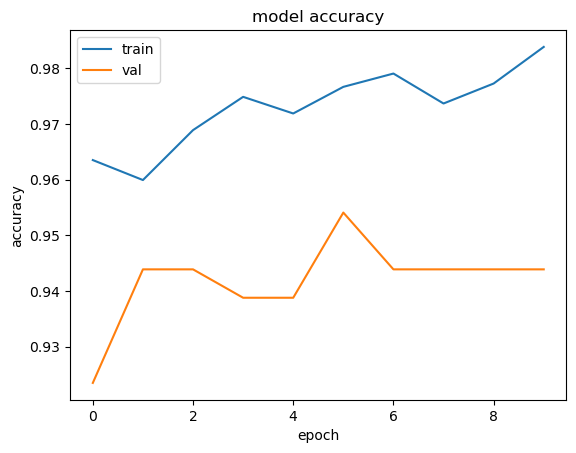

In [17]:
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

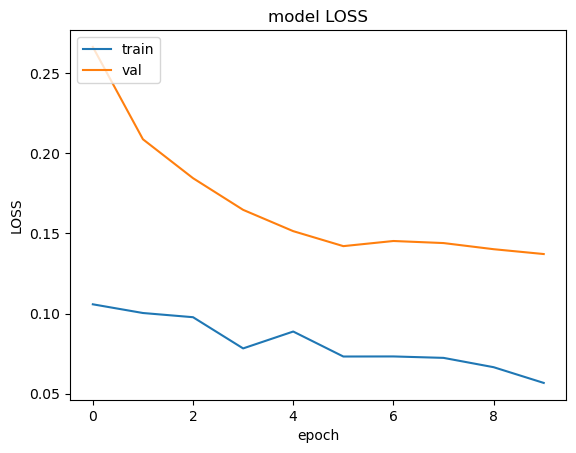

In [18]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model LOSS')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [28]:
#new_model = model.save('FireDetector-v5.h5')